In [1]:
import sys, os, copy, re, random
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as tck
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1)
sns.set_style("whitegrid")
#palette = list(mcolors.TABLEAU_COLORS.keys())
#palette.extend(['salmon', 'teal','yellowgreen'])
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")
palette = sns.color_palette(as_cmap=True)

In [4]:
# Read data:
df = list(pd.read_excel('plotting_data.xlsx', sheet_name=None).values())[0]
df['Cell_vol'] = df['Mean cell size'] * (2**df['Log2 cells']) * 1e-9
df.head(3)

,Asp,Rescue,Log2 cells,Mean cell size,Mean cell size norm,Cell_vol
0,1 mM,Vehicle,14.145295,5659,1.000000,0.102541
1,1 mM,Pyr,13.989927,4887,0.863580,0.079511
2,1 mM,Uridine,14.319813,6901,1.219473,0.141125


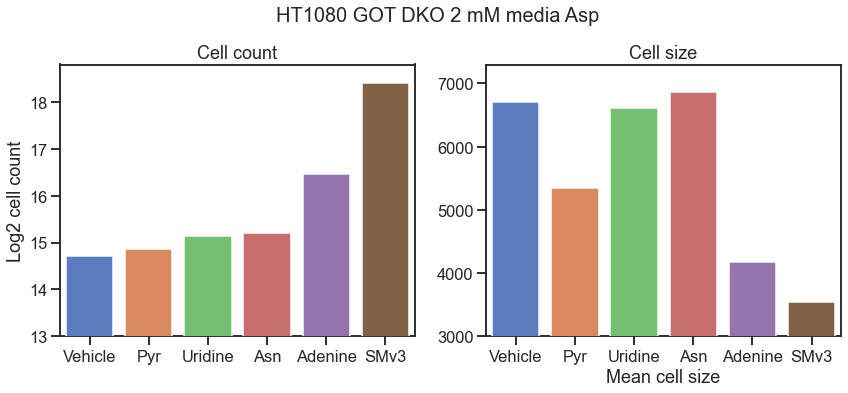

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False, gridspec_kw={'width_ratios': [1, 1]})
fig.text(0.5, 1, 'HT1080 GOT DKO 2 mM media Asp', ha='center', size=20)

conc_mask = df['Asp'] == '2 mM'
g1 = sns.barplot(ax=ax1, data=df[conc_mask], x='Rescue', y='Log2 cells', zorder=20)

ax1.set_title('Cell count');
ax1.set(ylim=(13, 18.8))
ax1.set_xlabel('')
ax1.set_ylabel('Log2 cell count');



g2 = sns.barplot(ax=ax2, data=df[conc_mask], x='Rescue', y='Mean cell size', zorder=20)

ax2.set_title('Cell size');
ax2.set(ylim=(3000, 7300))
ax2.set_ylabel('')
ax2.set_xlabel('Mean cell size');

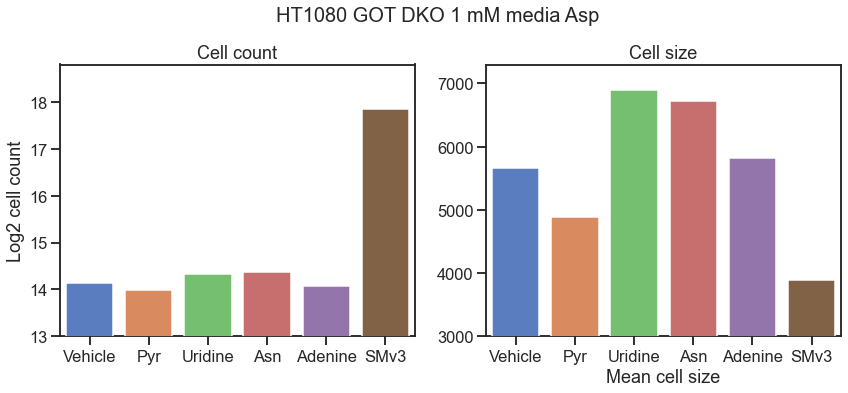

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False, gridspec_kw={'width_ratios': [1, 1]})
fig.text(0.5, 1, 'HT1080 GOT DKO 1 mM media Asp', ha='center', size=20)

conc_mask = df['Asp'] == '1 mM'
g1 = sns.barplot(ax=ax1, data=df[conc_mask], x='Rescue', y='Log2 cells', zorder=20)

ax1.set_title('Cell count');
ax1.set(ylim=(13, 18.8))
ax1.set_xlabel('')
ax1.set_ylabel('Log2 cell count');



g2 = sns.barplot(ax=ax2, data=df[conc_mask], x='Rescue', y='Mean cell size', zorder=20)

ax2.set_title('Cell size');
ax2.set(ylim=(3000, 7300))
ax2.set_ylabel('')
ax2.set_xlabel('Mean cell size');


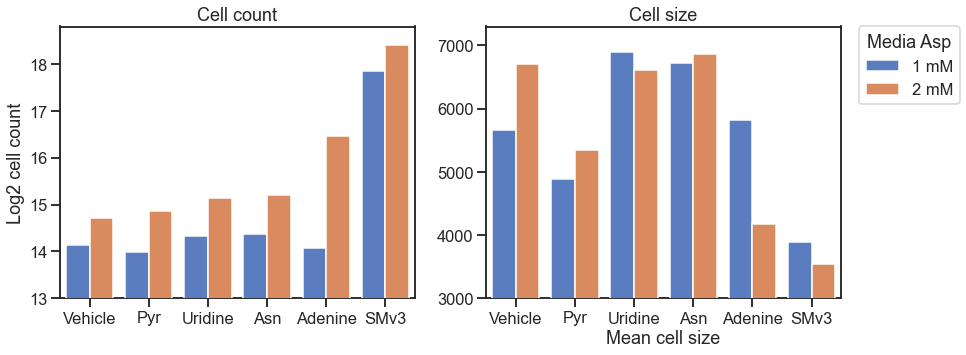

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False, gridspec_kw={'width_ratios': [1, 1]})
conc_mask = df['Asp'] == 1
g1 = sns.barplot(ax=ax1, data=df, x='Rescue', y='Log2 cells', hue='Asp', zorder=20)

ax1.set_title('Cell count');
ax1.get_legend().remove()
ax1.set(ylim=(13, 18.8))
ax1.set_xlabel('')
ax1.set_ylabel('Log2 cell count');



g2 = sns.barplot(ax=ax2, data=df, x='Rescue', y='Mean cell size', hue='Asp', zorder=20)

ax2.set_title('Cell size');
ax2.get_legend().remove()
ax2.set(ylim=(3000, 7300))
ax2.set_ylabel('')
ax2.set_xlabel('Mean cell size')


# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Media Asp')


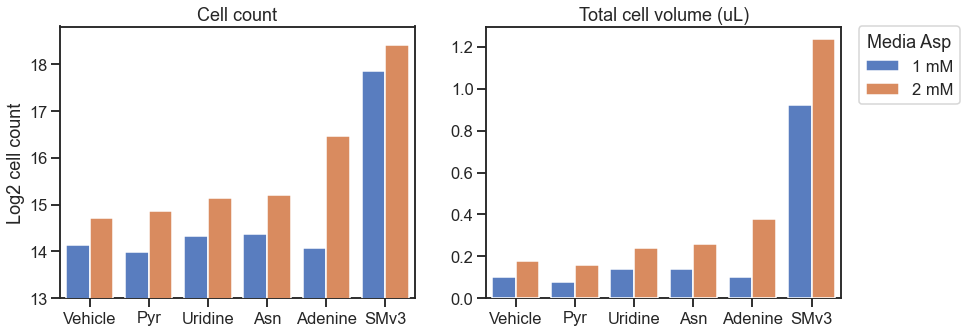

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=False, gridspec_kw={'width_ratios': [1, 1]})
conc_mask = df['Asp'] == 1
g1 = sns.barplot(ax=ax1, data=df, x='Rescue', y='Log2 cells', hue='Asp', zorder=20)

ax1.set_title('Cell count');
ax1.get_legend().remove()
ax1.set(ylim=(13, 18.8))
ax1.set_xlabel('')
ax1.set_ylabel('Log2 cell count');



g2 = sns.barplot(ax=ax2, data=df, x='Rescue', y='Cell_vol', hue='Asp', zorder=20)

ax2.set_title('Total cell volume (uL)');
ax2.get_legend().remove()
#ax2.set(ylim=(3000, 7300))
ax2.set_ylabel('')
ax2.set_xlabel('')


# Legend:
handles, labels = ax1.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Media Asp')
